### Standard Python and R imports

In [15]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [17]:
%%R

# My commonly used R imports

require('tidyverse')
require('broom')
require('GGally')
require('fread')
require('data.table')

Loading required package: fread
In addition: Warning message:
In library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE,  :
  there is no package called ‘fread’


In [79]:
%%R

df_filtered <- fread('../data/final_data_filtered.csv')

# Single Variable Linear Regressions

### Does median income in a school's community correlate with the ratio?

In [23]:
%%R

income_susp_lm <- lm(susp_black_white_ratio ~ med_hh_inc, data = df_filtered)

In [24]:
%%R
options(width = 5000)

print(summary(income_susp_lm))
# using tidy to actually see the terms
tidy(income_susp_lm)


Call:
lm(formula = susp_black_white_ratio ~ med_hh_inc, data = df_filtered)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7646 -0.8203 -0.3378  0.4015 22.7991 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
 1.671e+00  1.577e-01  10.601  < 2e-16 ***
 1.324e-05  2.444e-06   5.418 7.67e-08 ***
---
0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 1.583 on 935 degrees of freedom
  (6684 observations deleted due to missingness)
Multiple R-squared:  0.03044,	Adjusted R-squared:  0.0294 
 29.35 on 1 and 935 DF,  p-value: 7.671e-08

# A tibble: 2 × 5
  term         estimate  std.error statistic  p.value
  <chr>           <dbl>      <dbl>     <dbl>    <dbl>
1 (Intercept) 1.67      0.158          10.6  7.12e-25
2 med_hh_inc  0.0000132 0.00000244      5.42 7.67e- 8


`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 6684 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 6684 rows containing missing values or values outside the scale range (`geom_point()`). 



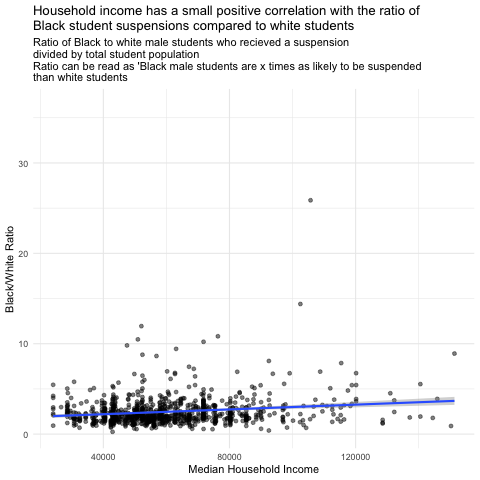

In [25]:
%%R

df_filtered %>%
    ggplot(aes(x = (med_hh_inc), y = susp_black_white_ratio)) + 
    geom_point(alpha = .5) + 
    xlab("Median Household Income") +
    ylab("Black/White Ratio") +
    labs(title = "Household income has a small positive correlation with the ratio of\nBlack student suspensions compared to white students",
        subtitle = "Ratio of Black to white male students who recieved a suspension\ndivided by total student population\nRatio can be read as 'Black male students are x times as likely to be suspended\nthan white students") +
    geom_smooth(method = "lm") + 
    theme_minimal()

## Does community inequality have a relationship with the ratio? 

In [26]:
%%R

ineq_susp_lm <- lm(susp_black_white_ratio ~ gini_inequality, data = df_filtered)
print(summary(ineq_susp_lm))
# using tidy to actually see the terms
tidy(ineq_susp_lm)


Call:
lm(formula = susp_black_white_ratio ~ gini_inequality, data = df_filtered)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2869 -0.8649 -0.3885  0.4161 23.3628 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
   3.5577     0.4469   7.961 4.91e-15 ***
  -2.4014     0.9850  -2.438    0.015 *  
---
0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 1.602 on 937 degrees of freedom
  (6682 observations deleted due to missingness)
Multiple R-squared:  0.006303,	Adjusted R-squared:  0.005242 
 5.943 on 1 and 937 DF,  p-value: 0.01496

# A tibble: 2 × 5
  term            estimate std.error statistic  p.value
  <chr>              <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)         3.56     0.447      7.96 4.91e-15
2 gini_inequality    -2.40     0.985     -2.44 1.50e- 2


`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 6682 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 6682 rows containing missing values or values outside the scale range (`geom_point()`). 



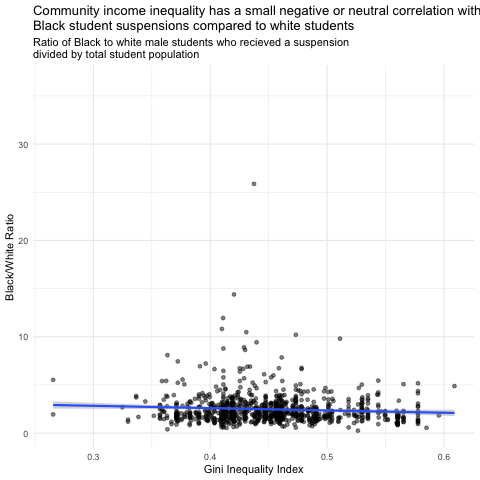

In [27]:
%%R

df_filtered %>%
    ggplot(aes(x = (gini_inequality), y = susp_black_white_ratio)) + 
    geom_point(alpha = .5) + 
    xlab("Gini Inequality Index") +
    ylab("Black/White Ratio") +
    labs(title = "Community income inequality has a small negative or neutral correlation with the ratio of\nBlack student suspensions compared to white students",
        subtitle = "Ratio of Black to white male students who recieved a suspension\ndivided by total student population") +      
geom_smooth(method = "lm") + 
    theme_minimal()

## Does community education have a relationship with the ratio? 

In [28]:
%%R

college_education_lm <- lm(susp_black_white_ratio ~ bach_plus_prop, data = df_filtered)
print(summary(college_education_lm))
# using tidy to actually see the terms
tidy(college_education_lm)


Call:
lm(formula = susp_black_white_ratio ~ bach_plus_prop, data = df_filtered)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9167 -0.8243 -0.3142  0.4259 22.8087 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
   1.7527     0.1234  14.208  < 2e-16 ***
   2.6269     0.4106   6.397 2.49e-10 ***
---
0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 1.57 on 943 degrees of freedom
  (6676 observations deleted due to missingness)
Multiple R-squared:  0.04159,	Adjusted R-squared:  0.04058 
 40.93 on 1 and 943 DF,  p-value: 2.487e-10

# A tibble: 2 × 5
  term           estimate std.error statistic  p.value
  <chr>             <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)        1.75     0.123     14.2  1.17e-41
2 bach_plus_prop     2.63     0.411      6.40 2.49e-10


`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 6676 rows containing non-finite outside the scale range (`stat_smooth()`). 

R[write to console]: 2: Removed 6676 rows containing missing values or values outside the scale range (`geom_point()`). 



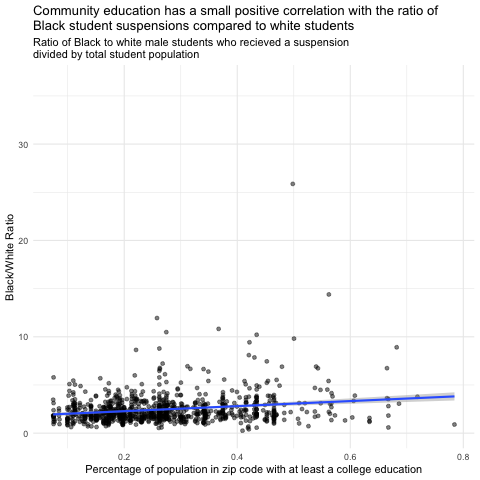

In [29]:
%%R

df_filtered %>%
    ggplot(aes(x = (bach_plus_prop), y = susp_black_white_ratio)) + 
    geom_point(alpha = .5) + 
    xlab("Percentage of population in zip code with at least a college education") +
    ylab("Black/White Ratio") +
    labs(title = "Community education has a small positive correlation with the ratio of\nBlack student suspensions compared to white students",
        subtitle = "Ratio of Black to white male students who recieved a suspension\ndivided by total student population") +      
geom_smooth(method = "lm") + 
    theme_minimal()

## Does black student population have a relationship with the ratio? 

`geom_smooth()` using formula = 'y ~ x'


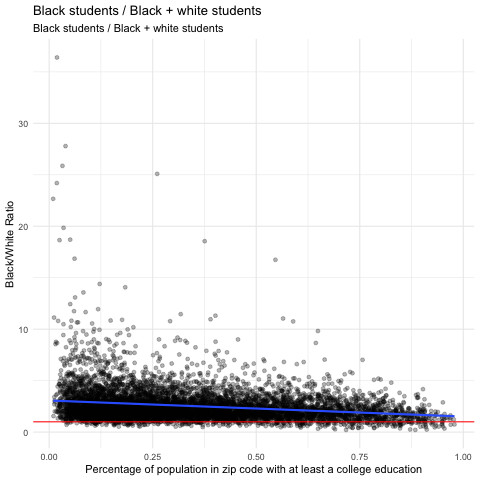

In [31]:
%%R

df_filtered %>%
    ggplot(aes(x = black_white_pop_ratio, y = (susp_black_white_ratio))) + 
    geom_point(alpha = .3) + 
    xlab("Percentage of population in zip code with at least a college education") +
    ylab("Black/White Ratio") +
    geom_hline(yintercept=1, color="red") +
    labs(title = "Black students / Black + white students",
        subtitle = "Black students / Black + white students") +      
geom_smooth(method = "lm") + 
    theme_minimal()

# Multivariate regression
Add in school racial demographics and school size and teacher student ratio, elementary schools, urban schools

In [80]:
%%R

mult_lm <- lm(susp_black_white_ratio ~ 
              gini_inequality + 
              log(med_hh_inc) + 
              log(white_prop) + 
              (bach_plus_prop) + 
                factor(SCH_GRADE_PS) +
                factor(SCH_GRADE_KG) +
                factor(SCH_GRADE_G06) +
                factor(SCH_GRADE_G07) +
                factor(SCH_GRADE_G08) +
                factor(SCH_GRADE_G09) +
                factor(SCH_GRADE_G10) +
                factor(SCH_GRADE_G11) +
                factor(SCH_GRADE_G12) + 
              factor(SCH_SSCLASSES_IND) + #single sex classes
              factor(SCH_GT_IND) + # gifted program
              factor(SCH_IBENR_IND) + #IB program
              factor(SCH_APSEL) + # AP Program
             teacher_prop + # total teachers / school pop
              security_pop_bool + 
              security_pop + 
              law_prop + 
              counc_prop + 
              cert_teacher_prop + 
              black_white_pop_ratio  
              , data = df_filtered)
print(summary(mult_lm))
# using tidy to actually see the terms



Call:
lm(formula = susp_black_white_ratio ~ gini_inequality + log(med_hh_inc) + 
    log(white_prop) + (bach_plus_prop) + factor(SCH_GRADE_PS) + 
    factor(SCH_GRADE_KG) + factor(SCH_GRADE_G06) + factor(SCH_GRADE_G07) + 
    factor(SCH_GRADE_G08) + factor(SCH_GRADE_G09) + factor(SCH_GRADE_G10) + 
    factor(SCH_GRADE_G11) + factor(SCH_GRADE_G12) + factor(SCH_SSCLASSES_IND) + 
    factor(SCH_GT_IND) + factor(SCH_IBENR_IND) + factor(SCH_APSEL) + 
    teacher_prop + security_pop_bool + security_pop + law_prop + 
    counc_prop + cert_teacher_prop + black_white_pop_ratio, data = df_filtered)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2218 -0.7735 -0.2280  0.3513  7.4247 

1 not defined because of singularities)
                               Estimate Std. Error t value Pr(>|t|)    
   4.991583   5.385923   0.927 0.354777    
  -1.048147   2.019291  -0.519 0.604093    
  -0.148451   0.423524  -0.351 0.726196    
  -0.006653   0.254401  -0.026 0.979155    
   2.372742   0.9685

In [81]:
%%R

print(tidy(mult_lm), n =30)

# A tibble: 25 × 5
   term                          estimate std.error statistic   p.value
   <chr>                            <dbl>     <dbl>     <dbl>     <dbl>
 1 (Intercept)                    4.99        5.39     0.927   0.355   
 2 gini_inequality               -1.05        2.02    -0.519   0.604   
 3 log(med_hh_inc)               -0.148       0.424   -0.351   0.726   
 4 log(white_prop)               -0.00665     0.254   -0.0262  0.979   
 5 bach_plus_prop                 2.37        0.969    2.45    0.0149  
 6 factor(SCH_GRADE_PS)Yes        1.97        0.748    2.64    0.00880 
 7 factor(SCH_GRADE_KG)Yes       -1.53        0.718   -2.14    0.0335  
 8 factor(SCH_GRADE_G06)Yes      -0.162       0.765   -0.212   0.832   
 9 factor(SCH_GRADE_G07)Yes       0.317       0.734    0.432   0.666   
10 factor(SCH_GRADE_G08)Yes      -0.309       0.442   -0.700   0.484   
11 factor(SCH_GRADE_G09)Yes       0.735       0.787    0.934   0.351   
12 factor(SCH_GRADE_G10)Yes      -0.714      

## Examine correlations


R[write to console]: In addition: 
R[write to console]: There were 32 warnings (use warnings() to see them)
R[write to console]: 



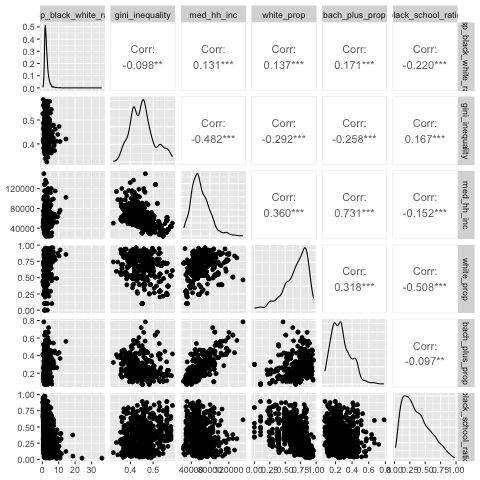

In [12]:
%%R

ggpairs(df_filtered %>% select(susp_black_white_ratio , 
              gini_inequality , 
              (med_hh_inc) ,
              (white_prop) , 
              (bach_plus_prop),
              black_school_ratio))

## Outliers
Find the top schools of ratio and get Black/white student population vs in-school suspensions

In [33]:
df_filtered[['LEA_STATE_x', 'SCH_NAME', 'SCH_ENR_BL_M', 'SCH_ENR_WH_M','SCH_DISCWODIS_ISS_BL_M', 'SCH_DISCWODIS_ISS_WH_M', 'susp_black_white_ratio']].sort_values(by = 'susp_black_white_ratio', ascending = False)[:10]

,LEA_STATE_x,SCH_NAME,SCH_ENR_BL_M,SCH_ENR_WH_M,SCH_DISCWODIS_ISS_BL_M,SCH_DISCWODIS_ISS_WH_M,susp_black_white_ratio
3780,OR,Thurston Middle School,6,206,6,9,36.400000
3809,PA,Connellsville Area MS,6,469,6,14,24.197861
3577,OH,Martins Ferry High School,9,168,6,7,18.700000
3446,NC,Ligon Middle,131,213,52,9,18.548887
2121,IA,South Middle School,40,301,11,6,14.395062
1837,IL,Dunlap High School,43,460,6,7,11.660294
5492,VA,WEST POTOMAC HIGH,229,481,35,8,11.458623
3457,NC,William G Enloe High,279,427,86,11,11.311254
5269,TX,LAKE HIGHLANDS J H,91,144,25,7,10.964286
2100,IA,Boulder Peak Intermediate School,16,261,7,11,10.822281
